# Librerie utilizzate

In [9]:
from matplotlib import pyplot as plt
import matplotlib.dates as md
import numpy as np
from osgeo import gdal
from datetime import datetime
import time
import os
import rasterio
from rasterio import features,MemoryFile
from rasterio.enums import Resampling
import pprint
import rasterio.mask

EPSG:32632


0

(229, 302)
(229, 302)


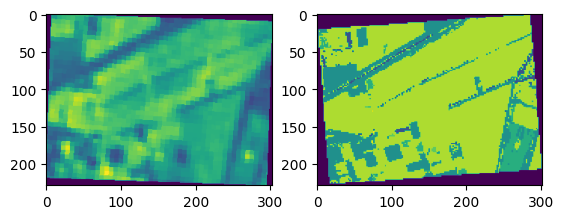

In [39]:
image1 = rasterio.open(r'scl\2016\12\2\0\R20m\SCL.jp2')
image2 = rasterio.open(r'bands\content\data\2016-12-02.tiff')

print(image1.crs)

mask2 = image2.dataset_mask()
mask1 = image1.dataset_mask()
for geom1, val1 in rasterio.features.shapes(
            mask1, transform=image1.transform):
        #geom1
        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:32632).
        geom1 = rasterio.warp.transform_geom(
            image1.crs, 'EPSG:32632', geom1, precision=6)

for geom2, val in rasterio.features.shapes(
            mask2, transform=image2.transform):
        #geom2
        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:32632).
        geom2 = rasterio.warp.transform_geom(
            image2.crs, 'EPSG:32632', geom2, precision=6)

geometry = [geom2]
out_image, out_transform = rasterio.mask.mask(image1, geometry, crop=True)
out_meta = image1.meta
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

#print(type(out_image))
#print(type(image1))
#print(image2.read(1).shape)
#print(out_image.shape)
#
#print(image2.read(1).shape[0])
#print(out_image.shape[1])
#print(image2.read(1).shape[0]/out_image.shape[1])
#print(image2.read(1).shape[1])
#print(out_image.shape[2])
#print(image2.read(1).shape[1]/out_image.shape[2])
#
#print("")
scalefactor = [image2.read(1).shape[0]/out_image.shape[1],image2.read(1).shape[1]/out_image.shape[2]]

with MemoryFile() as memfile:
        with memfile.open(**out_meta) as dataset:  # Open as DatasetWriter
            dataset.write(out_image)
        ramTemp = memfile.open()

FinalMask = ramTemp.read(
            out_shape=(
                ramTemp.count, 
                int(ramTemp.height*scalefactor[0]), 
                int(ramTemp.width*scalefactor[1])
                ),
            resampling=Resampling.nearest)

display(FinalMask[0][1,2])
filterMask = (FinalMask[0]==4) | (FinalMask[0]==5) | (FinalMask[0]==6)
filtered_res = np.ma.masked_array(image2.read(1),filterMask,fill_value=0)
print(filterMask.shape)
print(image2.read(1).shape)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(image2.read(1))
axarr[1].imshow(FinalMask[0])
plt.show()
